In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
letters_shapes = [['111111',
          '001100',
          '001100',
          '001100',
          '001100',
          '001100'],
         ['100001',
          '010010',
          '001100',
          '001100',
          '010010',
          '100001'],
         ['001100',
          '010010',
          '100001',
          '100001',
          '010010',
          '001100'],
         ['111111',
          '100001',
          '100001',
          '100001',
          '100001',
          '111111'],
         ['001100',
          '001100',
          '110011',
          '110011',
          '001100',
          '001100']]

In [27]:
shapes = []
for l in letters_shapes:
    l_list = []
    for str_l in l:
        str_list = list(map(int, list(str_l)))
        l_list += str_list
    shapes += [l_list]

shapes = np.array(shapes)
print(shapes.shape)

(5, 36)


In [28]:
def plot_images(images):
    shape = int(np.sqrt(images.shape[1]))
    fig, ax1 = plt.subplots(1, len(images), figsize=(3, 3), sharex = True, sharey = True)
    for num, im in enumerate(images):
        ax1[num].imshow(im.reshape((shape, shape)), cmap = 'gray')
    
    plt.show()

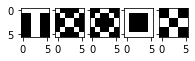

In [29]:
plot_images(shapes)

In [30]:
def make_noise(images, noise_percent):
    size = images.shape[1]
    a = np.arange(size)
    images_new = []
    for image in images:
        np.random.shuffle(a)
        randoms = a[:int(size*noise_percent/100)]
        image = np.array([not(i) if pos in randoms else i for pos, i in enumerate(image)])
        images_new += [image]
    return np.array(images_new)

In [117]:
class Network(object):

    """
    sdssdvfv
    """

    def __init__(self, input_size, output_size, weight_init_fn, lr):

        self.train_mode = True
        self.input_size = input_size
        self.output_size = output_size
        self.wins = np.zeros(output_size)
        self.lr = lr
        self.epoches = 0
        # <---------------------

        self.W = weight_init_fn(output_size, input_size)
        self.dW = np.zeros_like(self.W)

    def forward(self, x):
        
        self.epoches += 1
        self.x = x
        #self.y = np.dot(self.x, self.W.T) 
        self.delta = np.sqrt(np.sum((self.x - self.W)**2, axis=1))

        return np.argmin(self.delta)
       

    def step(self):
        
        if self.train_mode:
        # update weight
            self.W += self.lr * self.dW

    def backward(self):
        
        argmin = np.argmin(self.delta*self.wins)
        d_min = self.W[argmin]
        self.wins[argmin] += 1
        self.dW = np.exp(-np.sum((d_min - self.W)**2, axis=1)).reshape((1,-1)).T * (self.x - self.W)

        return 

    def __call__(self, x):
        return self.forward(x)

    def train(self):
        self.train_mode = True

    def evaluate(self):
        self.train_mode = False


In [32]:
def random_normal_weight_init(d0, d1):
    return np.random.randn(d0, d1)

def constant_weight_init(d0, d1):
    return np.full(shape=(d0, d1), fill_value=0.15)

In [85]:
def get_test_stats(mlp, test_x):
    mlp.evaluate()
    test_pred = []

    for t_x in test_x:
        test_pred.append(mlp.forward(t_x))

    return test_pred

In [45]:
def get_training_stats(mlp, trainx, nepochs):

    objects_ls = np.arange(len(trainx))

    mlp.train()
    for e in range(nepochs):
        np.random.shuffle(objects_ls)
        trainx = trainx[objects_ls]
        
        for trx in trainx:
            mlp.forward(trx)
            mlp.backward()
            mlp.step()
            
    mlp.evaluate()
    return 

In [121]:
mlp = Network(input_size = shapes.shape[1], \
          output_size = shapes.shape[0], \
          weight_init_fn = random_normal_weight_init, \
          lr=0.2)

In [122]:
n_epochs = 15
train_size = 3
train_shapes = make_noise(np.repeat(shapes, train_size, axis=0), 3)
train_answers = np.repeat([i for i in range(shapes.shape[0])], train_size)
get_training_stats(mlp, train_shapes, n_epochs)

In [123]:
test_size = 5
#mlp.W = best_weights
noise_percent = np.linspace(0, 100, num=11, dtype = int)
test_shapes = np.repeat(shapes, test_size, axis=0)
test_answers = np.repeat([i for i in range(shapes.shape[0])], test_size) 

for noise in noise_percent:
    noise_test_shapes = make_noise(test_shapes, noise)
    test_dst = noise_test_shapes
    test_pred = get_test_stats(mlp, test_dst)
    print('Percent of noise:', noise)
    for sh in range(shapes.shape[0]):
        print('Shape ', sh, ': ', np.bincount(test_pred[sh*test_size:sh*test_size+test_size], minlength=shapes.shape[0]))
    

Percent of noise: 0
Shape  0 :  [5 0 0 0 0]
Shape  1 :  [0 0 5 0 0]
Shape  2 :  [0 5 0 0 0]
Shape  3 :  [0 0 0 0 5]
Shape  4 :  [0 0 0 5 0]
Percent of noise: 10
Shape  0 :  [5 0 0 0 0]
Shape  1 :  [0 0 5 0 0]
Shape  2 :  [0 5 0 0 0]
Shape  3 :  [0 0 0 0 5]
Shape  4 :  [0 0 0 5 0]
Percent of noise: 20
Shape  0 :  [5 0 0 0 0]
Shape  1 :  [0 0 5 0 0]
Shape  2 :  [0 5 0 0 0]
Shape  3 :  [0 0 0 0 5]
Shape  4 :  [0 0 0 5 0]
Percent of noise: 30
Shape  0 :  [5 0 0 0 0]
Shape  1 :  [0 0 5 0 0]
Shape  2 :  [0 5 0 0 0]
Shape  3 :  [0 0 0 0 5]
Shape  4 :  [0 0 0 5 0]
Percent of noise: 40
Shape  0 :  [4 0 0 1 0]
Shape  1 :  [0 1 4 0 0]
Shape  2 :  [0 4 1 0 0]
Shape  3 :  [0 2 0 0 3]
Shape  4 :  [0 2 0 2 1]
Percent of noise: 50
Shape  0 :  [1 0 3 1 0]
Shape  1 :  [2 1 1 1 0]
Shape  2 :  [0 0 2 3 0]
Shape  3 :  [0 0 2 3 0]
Shape  4 :  [1 1 2 0 1]
Percent of noise: 60
Shape  0 :  [0 2 1 1 1]
Shape  1 :  [3 0 0 1 1]
Shape  2 :  [1 0 1 1 2]
Shape  3 :  [0 1 1 3 0]
Shape  4 :  [0 1 3 0 1]
Percent of noi